# Analysis and insights Python script: Retail market analysis in Barcelona
## Part 4: Analysis and insights

### In this part we are going to carry out the actual analysis of the data.

### We are going to start answering the seed questions that were formulated at the beginning of the project.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa
import folium

pd.options.display.max_columns = None

## Import the data

In [2]:
con = sa.create_engine('sqlite:///data/airbnb.db')

df = pd.read_sql("df_final", con = con)

df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,total_price,occupancy_rate,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,purchase_price,distance_center
0,0,0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,129,1,264,110m2 apartment to rent in Barcelona. Located ...,f,8,3.0,6.0,33,4.31,4.69,4.81,4835,129.0,27,03_Three,5-16,3-24,5-48,90,326362.5,2.068818
1,1,1,23197,"Forum CCIB DeLuxe, Spacious, Elegant ,Christmas",90417,Sant Martí,el Besòs i el Maresme,41.41243,2.21975,Entire home/apt,195,4,255,"Beautiful spacious apartment, large terrace, 5...",t,5,3.0,4.0,65,4.75,4.98,4.58,3544,195.0,30,03_Three,4,2,5-48,90,239220.0,4.929384
2,2,2,32711,Sagrada Familia area - Còrsega 1,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,73,2,276,A lovely two bedroom apartment only 250 m from...,f,6,2.0,3.0,83,4.40,4.84,4.86,4491,73.0,24,02_Two,4,2,5-48,70,235777.5,2.079864
3,3,3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,174,5,139,Spacious apartment for large families or group...,f,9,4.0,6.0,190,4.51,4.68,4.69,4165,174.0,61,04_Four or more,5-16,3-24,48-744,120,374850.0,0.897723
4,4,4,40983,Classical loft close to pedrera!,177617,Eixample,la Dreta de l'Eixample,41.39631,2.16832,Entire home/apt,60,2,267,Our cool and comfortable one bedroom apartment...,f,4,1.0,1.0,254,4.37,4.77,4.88,4835,60.0,26,01_One,0-3,1,48-744,50,181312.5,1.068286


## Analysis

### Price analysis

**What is the average price? What about the price range? What is the variation among the different districts?**

**What is the average renting price ranking for the different districts and neighbourhoods?**

In [3]:
df["total_price"].describe().T

count    10723.000000
mean       162.351590
std       1079.892106
min         20.000000
25%         56.000000
50%         96.000000
75%        145.000000
max      90000.000000
Name: total_price, dtype: float64

There is at least one outlier that unbiases the mean value for the renting price. We are going to use the median instead.

In [4]:
df["total_price"].median()

96.0

In [5]:
df["purchase_price"].median()

181312.5

In [6]:
df.groupby("neighbourhood_group")["total_price"].agg(["median",]).sort_values(by = "median",ascending=False)

,median
neighbourhood_group,
Eixample,111.0
Sarrià-Sant Gervasi,103.0
Sant Martí,95.0
Les Corts,94.5
Gràcia,91.0
Sants-Montjuïc,83.0
Ciutat Vella,80.0
Horta-Guinardó,68.5
Sant Andreu,61.6


L'Eixample appears to be the district with the highest median renting price in Barcelona. 

While the lowest median belong to Nou Barris.

Let's analyse Eixample district.

In [7]:
df[df["neighbourhood_group"] == "Eixample"].sort_values(by="total_price", ascending=False).head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,total_price,occupancy_rate,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,purchase_price,distance_center
2543,2543,2543,14484042,Habitacion enorme muy bien situada,63047696,Eixample,la Nova Esquerra de l'Eixample,41.38261,2.14987,Private room,90000,1,0,Habitación doble muy luminosa en piso muy limp...,f,2,1.0,1.0,1,5.0,5.0,4.0,4835,90000.0,100,01_One,0-3,1,1-4,50,181312.5,1.859582
6715,6715,6715,43479394,"Hotel Mosaic, Inside Double Room",340466110,Eixample,la Dreta de l'Eixample,41.39147,2.16259,Private room,9200,1,365,Imagine waking up in a hotel with its own char...,f,2,1.0,1.0,1,5.0,5.0,5.0,4835,9200.0,0,01_One,0-3,1,1-4,50,181312.5,0.886984
6730,6730,6730,43479417,"Hotel Mosaic, Double Room with Terrace",340466110,Eixample,la Dreta de l'Eixample,41.39162,2.16122,Private room,9200,1,365,Imagine waking up in a hotel with its own char...,f,2,1.0,1.0,0,NaN,NaN,NaN,4835,9200.0,0,01_One,0-3,1,1-4,50,181312.5,0.992168
6731,6731,6731,43479419,"Hotel Mosaic, Double Room with Balcony",340466110,Eixample,la Dreta de l'Eixample,41.39148,2.16131,Private room,9200,1,365,Imagine waking up in a hotel with its own char...,f,2,1.0,1.0,0,NaN,NaN,NaN,4835,9200.0,0,01_One,0-3,1,1-4,50,181312.5,0.977704
6732,6732,6732,43479422,"Hotel Mosaic, Suite with Terrace",340466110,Eixample,la Dreta de l'Eixample,41.39364,2.16108,Private room,9200,1,365,Imagine waking up in a hotel with its own char...,f,2,1.0,1.0,0,NaN,NaN,NaN,4835,9200.0,0,01_One,0-3,1,1-4,50,181312.5,1.134257


Most expensive properties are private rooms at prices around 9200€. There is even one private room for 90000€.

There must be an error.

There is no relevant insight from this analysis.

Let's compare now the renting price and purchase price.

In [8]:
temp = df.groupby("neighbourhood_group")[["total_price","purchase_price"]].agg("median")
temp

,total_price,purchase_price
neighbourhood_group,,
Ciutat Vella,80.0,156187.5
Eixample,111.0,253837.5
Gràcia,91.0,168412.5
Horta-Guinardó,68.5,115987.5
Les Corts,94.5,189112.5
Nou Barris,47.0,91650.0
Sant Andreu,61.6,119700.0
Sant Martí,95.0,132900.0
Sants-Montjuïc,83.0,126862.5


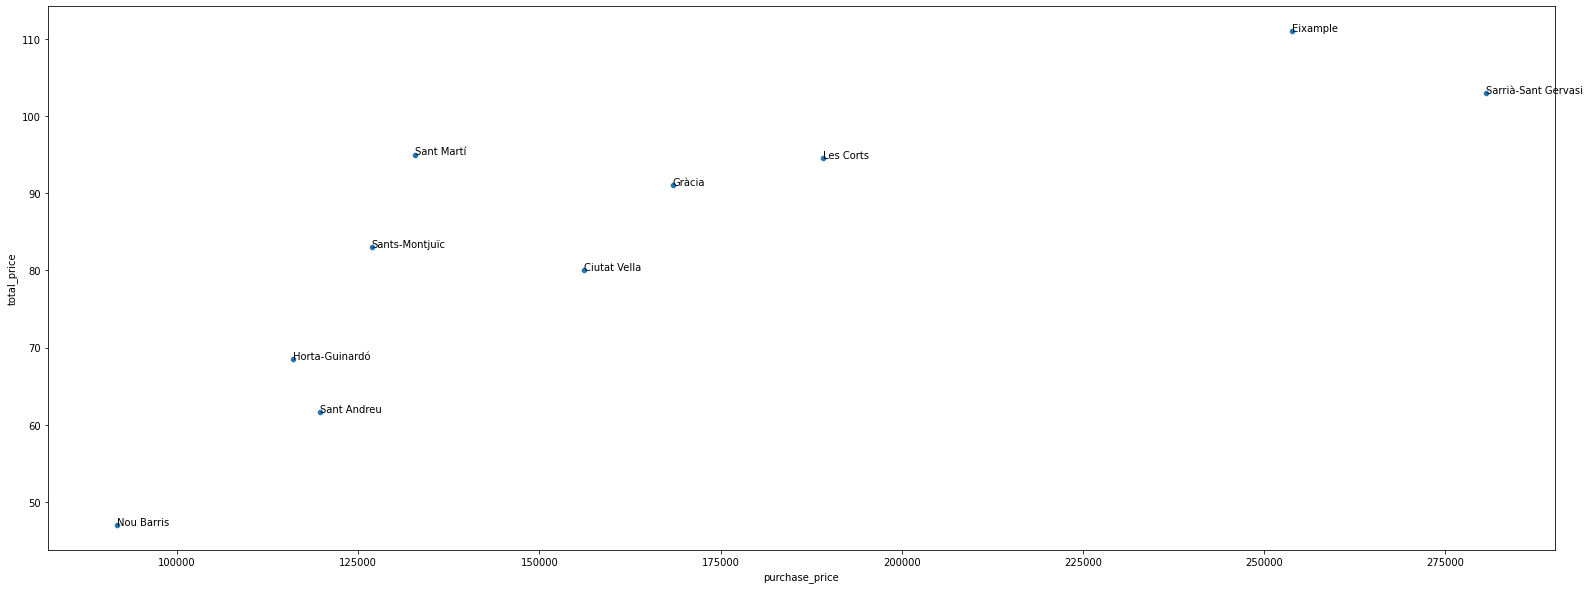

In [9]:
plt.figure(figsize = (27,10))
sns.scatterplot(data = temp, x = "purchase_price", y = "total_price")
# plt.axhline(y = 204, ls="--", lw=0.5, color="r")
# plt.axvline(x = 187380, ls="--", lw=0.5, color="r")
# Put the labels
for i in range(0,temp.shape[0]):
    plt.text(temp.purchase_price[i], temp.total_price[i], temp.index[i])

This scatter plot helps us to identify which towns are most profitable and which ones are not.

- It is clear that Deyá presents the highest median renting price, but also almost the highest median purchase price. 
- On the other hand Palma shows the lowest median renting price, with a median purchase price close to the total median of the island.

It might look clearer by representing the median renting price and median purchase price in the plot.

In [10]:
temp = df.groupby("neighbourhood")[["total_price","purchase_price"]].agg("median")
temp.sort_values(by = "total_price", ascending=False)

,total_price,purchase_price
neighbourhood,,
la Marina del Prat Vermell,200.0,304470.0
"Vallvidrera, el Tibidabo i les Planes",166.5,240570.0
la Dreta de l'Eixample,134.0,253837.5
Diagonal Mar i el Front Marítim del Poblenou,121.0,186060.0
la Vila Olímpica del Poblenou,119.5,186060.0
...,...,...
la Prosperitat,36.5,91650.0
Canyelles,32.0,91650.0
Verdun,30.5,91650.0


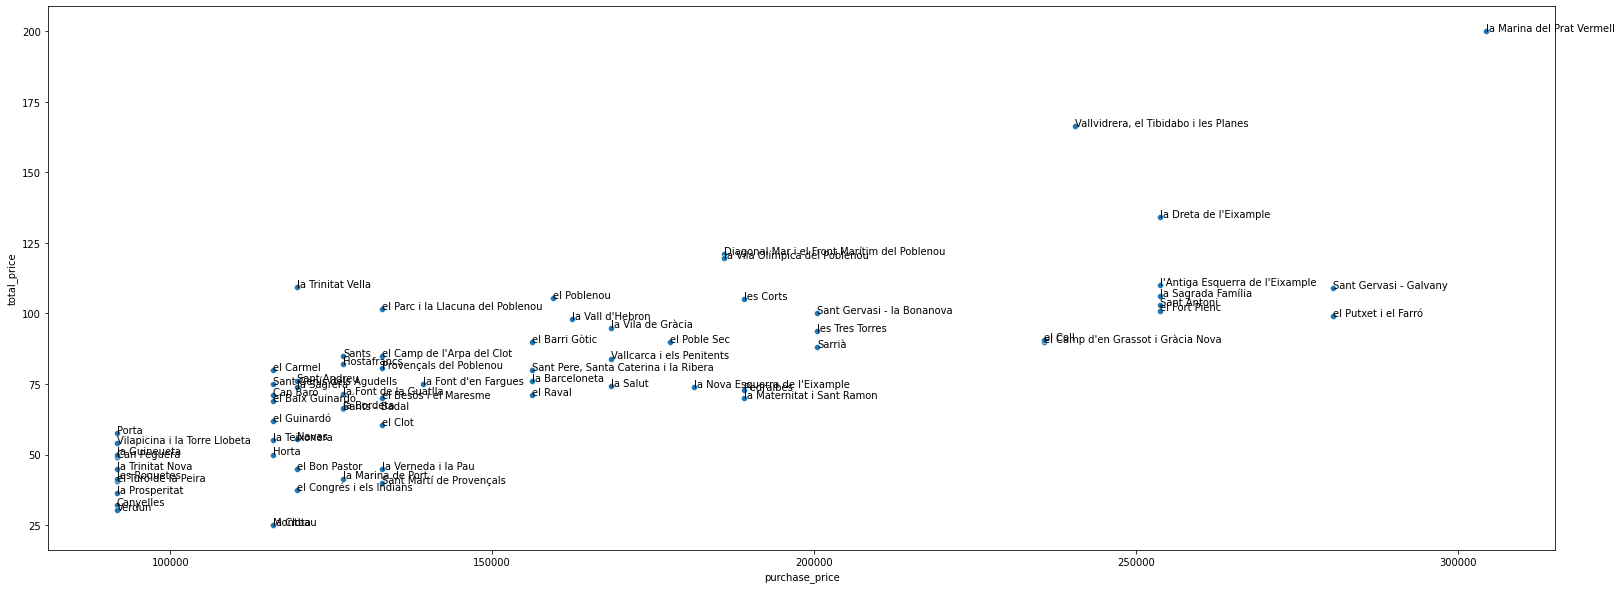

In [11]:
plt.figure(figsize = (27,10))
sns.scatterplot(data = temp, x = "purchase_price", y = "total_price")
# plt.axhline(y = 204, ls="--", lw=0.5, color="k")
# plt.axvline(x = 187380, ls="--", lw=0.5, color="k")
# Put the labels
for i in range(0,temp.shape[0]):
    plt.text(temp.purchase_price[i], temp.total_price[i], temp.index[i])

In [12]:
# df.groupby("total_price")["neighbourhood"].median()
# df.groupby("total_price")[["neighbourhood"]].agg("median")
df.groupby("neighbourhood")["total_price"].median()

neighbourhood
Can Baró                                         71.0
Can Peguera                                      49.0
Canyelles                                        32.0
Diagonal Mar i el Front Marítim del Poblenou    121.0
Horta                                            50.0
                                                ...  
la Vila Olímpica del Poblenou                   119.5
la Vila de Gràcia                                95.0
les Corts                                       105.0
les Roquetes                                     41.5
les Tres Torres                                  93.8
Name: total_price, Length: 69, dtype: float64

- The most profitable investments are the ones located on the first quadrant (top left) --> Lowest purchase price with high renting prices.

**Insight 1: We have identified potential towns in Mallorca that maximise the relationship cost/revenue.**

**Are there other factors that determine the renting price?**

Let's analyse this by grouping the renting and purchase price by the following relevant dimensions:

- bedrooms_disc
- accomodates_disc
- beds_disc
- number_of_reviews_disc

In [13]:
metrics = ['total_price','purchase_price']
dimensions = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicube_price = df[dimensions + metrics]
minicube_price

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,total_price,purchase_price
0,03_Three,5-16,3-24,5-48,129.0,326362.5
1,03_Three,4,2,5-48,195.0,239220.0
2,02_Two,4,2,5-48,73.0,235777.5
3,04_Four or more,5-16,3-24,48-744,174.0,374850.0
4,01_One,0-3,1,48-744,60.0,181312.5
...,...,...,...,...,...,...
10718,01_One,0-3,1,1-4,366.8,181312.5
10719,02_Two,0-3,1,1-4,90.0,162382.5
10720,01_One,0-3,1,1-4,39.0,181312.5
10721,01_One,0-3,1,1-4,50.0,119700.0


In [14]:
minicube_price = minicube_price.melt(id_vars=["total_price","purchase_price"])
minicube_price

,total_price,purchase_price,variable,value
0,129.0,326362.5,bedrooms_disc,03_Three
1,195.0,239220.0,bedrooms_disc,03_Three
2,73.0,235777.5,bedrooms_disc,02_Two
3,174.0,374850.0,bedrooms_disc,04_Four or more
4,60.0,181312.5,bedrooms_disc,01_One
...,...,...,...,...
42887,366.8,181312.5,number_of_reviews_disc,1-4
42888,90.0,162382.5,number_of_reviews_disc,1-4
42889,39.0,181312.5,number_of_reviews_disc,1-4
42890,50.0,119700.0,number_of_reviews_disc,1-4


In [15]:
minicube_price = minicube_price.groupby(["variable","value"])[["total_price","purchase_price"]].agg("median")
minicube_price

total_price  purchase_price
variable               value                                       
accommodates_disc      0-3                     75.6        181312.5
                       4                      126.0        253837.5
                       5-16                   201.0        374850.0
bedrooms_disc          01_One                  63.0        156187.5
                       02_Two                 113.0        235777.5
                       03_Three               135.5        326362.5
                       04_Four or more        216.0        435150.0
beds_disc              1                       67.2        168412.5
                       2                      121.0        253837.5
                       3-24                   177.0        326362.5
number_of_reviews_disc 1-4                     80.0        181312.5
                       48-744                 105.0        228352.5
                       5-48                   105.0        186060.0

The price is ready to be analysed by the different relevant dimensions. 

Let's start with bedrooms_disc.

In [16]:
minicube_price.loc["bedrooms_disc"]

,total_price,purchase_price
value,,
01_One,63.0,156187.5
02_Two,113.0,235777.5
03_Three,135.5,326362.5
04_Four or more,216.0,435150.0


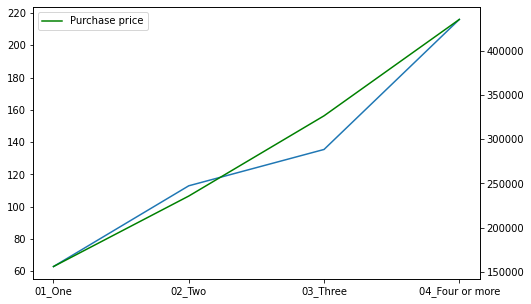

In [17]:
f, ax = plt.subplots(figsize=(8,5))
ax.plot(minicube_price.loc['bedrooms_disc']["total_price"], label="Renting price")
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['bedrooms_disc']["purchase_price"], color ="g", label="Purchase price")
ax2.legend();

In [18]:
minicube_price.loc["beds_disc"]

,total_price,purchase_price
value,,
1,67.2,168412.5
2,121.0,253837.5
3-24,177.0,326362.5


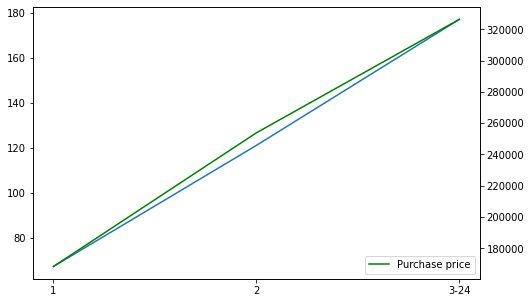

In [19]:
f, ax = plt.subplots(figsize=(8,5))
ax.plot(minicube_price.loc['beds_disc']["total_price"], label="Renting price")
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['beds_disc']["purchase_price"], color ="g", label="Purchase price")
ax2.legend(loc=4);

In [20]:
minicube_price.loc["accommodates_disc"]

,total_price,purchase_price
value,,
0-3,75.6,181312.5
4,126.0,253837.5
5-16,201.0,374850.0


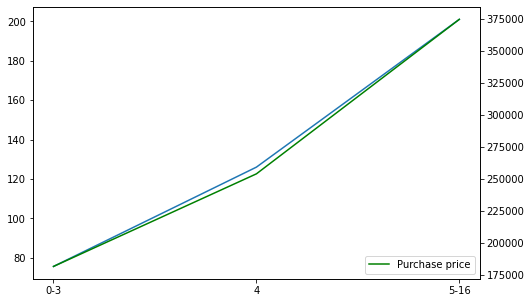

In [21]:
f, ax = plt.subplots(figsize=(8,5))
ax.plot(minicube_price.loc['accommodates_disc']["total_price"], label="Renting price")
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['accommodates_disc']["purchase_price"], color ="g", label="Purchase price")
ax2.legend(loc=4);

In [22]:
df.groupby("neighbourhood_group")["distance_center"].agg("median").sort_values()

neighbourhood_group
Ciutat Vella           0.824891
Eixample               1.312648
Gràcia                 2.030087
Sants-Montjuïc         2.328133
Sarrià-Sant Gervasi    2.901453
Sant Martí             2.956615
Les Corts              3.463348
Horta-Guinardó         3.517668
Sant Andreu            4.124809
Nou Barris             5.117845
Name: distance_center, dtype: float64

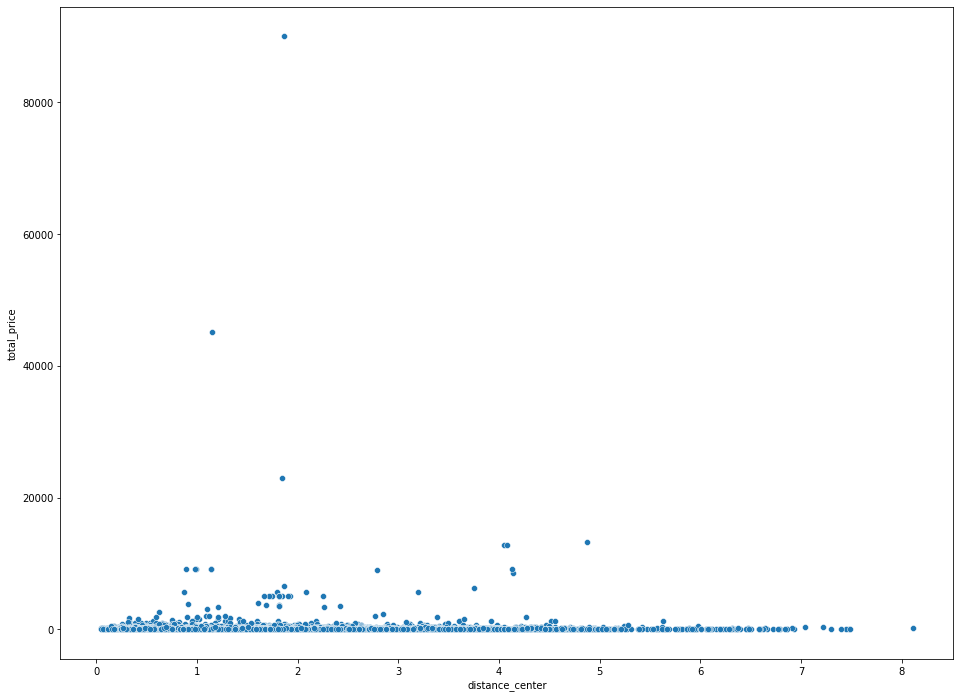

In [23]:
seleccion = df.groupby('neighbourhood_group').distance_center.median().sort_values().index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.neighbourhood_group.isin(seleccion)], x = 'distance_center', y = 'total_price');